# Описание проекта

Требуется определить где разрабатывать новые нефтяные скважины.

Для чего требуется обучить модель, которая поможет выбрать регион, где добыча принесёт наибольшую прибыль. 

Шаги для выбора локации:

- Поиск месторождений в избранном регионе, определение значений признаков для каждого месторождения;
- Посторение модели и оценка объём запасов;
- Выбор месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Исходные данные

Данные геологоразведки трех регионов. 

- id - идентификатор скважины
- f0, f1, f2 - значимые признака скважины
- product - объем запасов в скважине (тыс. баррелей)

При разведке региона исследуют 500 точек из которых выбирают 200 самых прибыльных.

Бюджет на разработку скважины в регионе - 10 млрд. рублей.

Один баррель сырья приносит 450 рублей дохода, доход с еденицы продукта 450 тыс. рублей.

## Содержание проекта
* 1.Подготовка данных
 - [1.1 Загрузка библиотек и исходных данных](#1.1-bullet) 
 - [1.2 Подготовка данных для обучения моделей](#1.2-bullet) 
* 2.Обучение модели для каждого региона
 - [2.1 Обучение модели для первого региона](#2.1-bullet) 
 - [2.2 Обучение модели для второго региона](#2.2-bullet) 
 - [2.3 Обучение модели для третьего региона](#2.3-bullet) 
 - [2.4 Анализ результатов](#2.4-bullet) 
* [3.Подготовка к расчету прибыли](#3-bullet) 
* [4. Расчет прибыли по предсказаниям модели](#4-bullet) 
* [5. Расчет рисков и прибыли для каждого региона](#5-bullet) 
* [6. Общий вывод](#6-bullet) 


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Молодец, что составляешь план.
</div>

# 1. Загрузка и подготовка данных

<a id='1.1-bullet'></a>
### 1.1 Загрузка библиотек и исходных данных

In [1]:
# загрузка библиотех
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib as plt

# сохраним исходные данные в переменных region_data_1, region_data_2, region_data_3
region_data_1 = pd.read_csv('/content/sample_data/geo_data_0.csv')
region_data_2 = pd.read_csv('/content/sample_data/geo_data_1.csv')
region_data_3 = pd.read_csv('/content/sample_data/geo_data_2.csv')

In [2]:
# просмотрим данные region_data_1
region_data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
# просмотрим информацию о данных region_data_1
region_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
# основные статистические характеристики датасета region_data_1
region_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
# просмотрим данные region_data_2
region_data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
# просмотрим информацию о данных region_data_2
region_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# основные статистические характеристики датасета region_data_2
region_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
# просмотрим данные region_data_3
region_data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [9]:
# просмотрим информацию о данных region_data_3
region_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
# основные статистические характеристики датасета region_data_3
region_data_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<a id='1.1-bullet'></a>
### 1.2 Подготовка данных для обучения моделей

In [11]:
# Сохраним признаки каждого датасета в переменной features, а целевые признаки в переменной target

# Создадим переменные features_1 и target_1 для первого региона с помощью ф-ии preparation
def preparation(data):
    f = data.drop(['id','product'], axis=1)
    t = data['product']
    return f, t

features_1, target_1 = preparation(region_data_1)  

In [12]:
# просмотрим полученную выборку features_1
features_1.head()

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


In [13]:
# просмотрим полученную выборку target_1
target_1.head()

0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

In [14]:
# Создадим переменные features_2 и target_2 для второго региона с помощью ф-ии preparation
features_2, target_2 = preparation(region_data_2)

In [15]:
# просмотрим полученную выборку features_2
features_2.head()

,f0,f1,f2
0,-15.001348,-8.276000,-0.005876
1,14.272088,-3.475083,0.999183
2,6.263187,-5.948386,5.001160
3,-13.081196,-11.506057,4.999415
4,12.702195,-8.147433,5.004363


In [16]:
# просмотрим полученную выборку target_2
target_2.head()

0      3.179103
1     26.953261
2    134.766305
3    137.945408
4    134.766305
Name: product, dtype: float64

In [17]:
# Создадим переменные features_3 и target_3 для третьей выборки с помощью ф-ии preparation
features_3, target_3 = preparation(region_data_3)

In [18]:
# просмотрим полученную выборку features_3
features_3.head()

,f0,f1,f2
0,-1.146987,0.963328,-0.828965
1,0.262778,0.269839,-2.530187
2,0.194587,0.289035,-5.586433
3,2.236060,-0.553760,0.930038
4,-0.515993,1.716266,5.899011


In [19]:
# просмотрим полученную выборку target_3
target_3.head()

0     27.758673
1     56.069697
2     62.871910
3    114.572842
4    149.600746
Name: product, dtype: float64

Text(0.5, 0, 'Объем запасов в скважинах, тыс.баррелей')

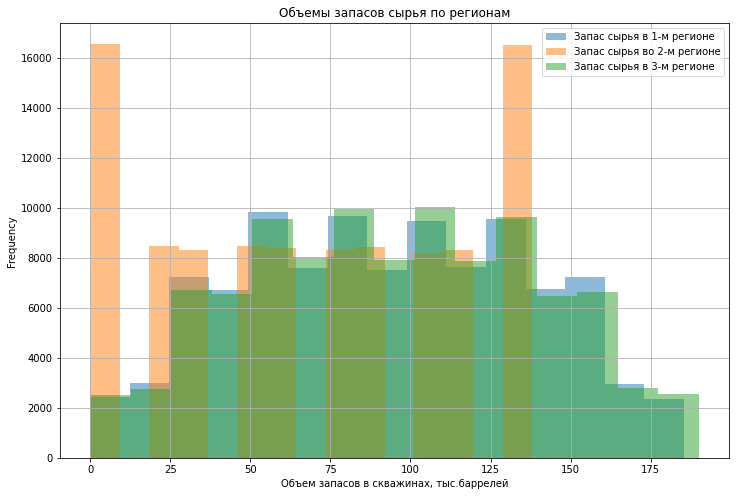

In [65]:
# Построим гистограммы объема запасов нефти по регионам
target_1.plot(kind='hist', bins=15, alpha=0.5, legend=True, label='Запас сырья в 1-м регионе')
target_2.plot(kind='hist', bins=15, alpha=0.5, legend=True, label='Запас сырья во 2-м регионе')
target_3.plot(kind='hist', bins=15, grid=True, alpha=0.5, figsize=(12, 8), legend=True, 
                        label='Запас сырья в 3-м регионе', 
                        title='Объемы запасов сырья по регионам').set_xlabel('Объем запасов в скважинах, тыс.баррелей')

### Вывод по п.1

В исходных данных отсутвуют пропуски, тип данных в каждом столобце соответвует содержащимся в нем данным.

При сохранении признаков в переменные **features_1, features_2, features_3** был отброшен столбец **id**, этот столбец содержит уникальные значения и поэтому никак не повлияет на качество обученаемой модели. 

Для 1-го и 3-го региона данные по объему сырья распределены более менее нормально, но данные для 2-го региона имеют некоторое смещение, т.к. среднее (68.8) больше медианы (57.1). 
Т.е. во 2-м регионе расположено большое количество скважин с запасом сырья не равным среднему значению.  

# 2. Обучение модели для каждого региона

<a id='2.1-bullet'></a>
### 2.1 Обучение модели для первого региона

In [21]:
# Разделим данные по 1-му региону на обучающую и валидационную выборки с помощью ф-ии split_data
def split_data(f, t):
    f_train, f_valid, t_train, t_valid = train_test_split(f, t, test_size=0.25, random_state=12345)
    return f_train, f_valid, t_train, t_valid

features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(features_1, target_1)

In [22]:
# Проверим размеры полученных выборок:
print('Размер обучающей выборки features_train_1:', features_train_1.shape) 
print('Размер обучающей выборки target_train_1:', target_train_1.shape)
print('Размер валидационной выборки features_valid_1:', features_valid_1.shape)
print('Размер валидационной выборки target_valid_1:', target_valid_1.shape)

Размер обучающей выборки features_train_1: (75000, 3)
Размер обучающей выборки target_train_1: (75000,)
Размер валидационной выборки features_valid_1: (25000, 3)
Размер валидационной выборки target_valid_1: (25000,)


In [23]:
# Обучим модель для 1-го региона методом линейной регрессии с помощью ф-ии model_learning
def model_learning(f_train, f_valid, t_train, t_valid):
    model = LinearRegression()
    model.fit(f_train, t_train)
    predictions = model.predict(f_valid)
    mean_product = predictions.mean()
    RMSE = mean_squared_error(t_valid, predictions) ** 0.5
    return predictions, mean_product, RMSE 

predictions_1, mean_product_1, RMSE_1 = model_learning(features_train_1, features_valid_1, target_train_1, target_valid_1)

# Метрика RMSE для 1-го региона
print('Модель для 1-го региона, метрика RMSE:', RMSE_1)

Модель для 1-го региона, метрика RMSE: 37.5794217150813


In [24]:
# Просмотрим предсказания для 1-го региона, начиная со скважин с наибольшими запасами  
region_predictions_1 = pd.Series(predictions_1)
region_predictions_1.sort_values(ascending=False).head()

9317     180.180713
219      176.252213
10015    175.850623
11584    175.658429
23388    173.299686
dtype: float64

In [25]:
# Средний запас нефти по 1-му региону
mean_product_1

92.59256778438038

<a id='2.2-bullet'></a>
### 2.2 Обучение модели для второго региона

In [26]:
# Разделим данные по 2-му региону на обучающую и валидационную выборки с помощью ф-ии split_data
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(features_2, target_2)

In [27]:
# Проверим размеры полученных выборок:
print('Размер обучающей выборки features_train_2:', features_train_2.shape) 
print('Размер обучающей выборки target_train_2:', target_train_2.shape)
print('Размер валидационной выборки features_valid_2:', features_valid_2.shape)
print('Размер валидационной выборки target_valid_2:', target_valid_2.shape)

Размер обучающей выборки features_train_2: (75000, 3)
Размер обучающей выборки target_train_2: (75000,)
Размер валидационной выборки features_valid_2: (25000, 3)
Размер валидационной выборки target_valid_2: (25000,)


In [28]:
# Обучим модель для 2-го региона методом линейной регрессии с помощью ф-ии model_learning
predictions_2, mean_product_2, RMSE_2 = model_learning(features_train_2, features_valid_2, target_train_2, target_valid_2)

# Метрика RMSE для 2-го региона
print('Модель для 2-го региона, метрика RMSE:', RMSE_2)

Модель для 2-го региона, метрика RMSE: 0.893099286775616


In [29]:
# Просмотрим предсказания для 2-го региона, начиная со скважин с наибольшими запасами  
region_predictions_2 = pd.Series(predictions_2)
region_predictions_2.sort_values(ascending=False).head()

20430    139.818970
7777     139.773423
8755     139.703330
1178     139.560938
4285     139.516754
dtype: float64

In [30]:
# Средний запас нефти по 2-му региону
mean_product_2

68.728546895446

<a id='2.3-bullet'></a>
### 2.3 Обучение модели для третьего региона

In [31]:
# Разделим данные по 3-му региону на обучающую и валидационную выборки с помощью ф-ии split_data
features_train_3, features_valid_3, target_train_3, target_valid_3 = split_data(features_3, target_3)

In [32]:
# Проверим размеры полученных выборок:
print('Размер обучающей выборки features_train_3:', features_train_3.shape) 
print('Размер обучающей выборки target_train_3:', target_train_3.shape)
print('Размер валидационной выборки features_valid_3:', features_valid_3.shape)
print('Размер валидационной выборки target_valid_3:', target_valid_3.shape)

Размер обучающей выборки features_train_3: (75000, 3)
Размер обучающей выборки target_train_3: (75000,)
Размер валидационной выборки features_valid_3: (25000, 3)
Размер валидационной выборки target_valid_3: (25000,)


In [33]:
# Обучим модель для 3-го региона методом линейной регрессии с помощью ф-ии model_learning
predictions_3, mean_product_3, RMSE_3 = model_learning(features_train_3, features_valid_3, target_train_3, target_valid_3)

# Метрика RMSE для 3-го региона
print('Модель для 3-го региона, метрика RMSE:', RMSE_3)

Модель для 3-го региона, метрика RMSE: 40.02970873393434


In [34]:
# Просмотрим предсказания для 3-го региона, начиная со скважин с наибольшими запасами  
region_predictions_3 = pd.Series(predictions_3)
region_predictions_3.sort_values(ascending=False).head()

22636    165.856833
24690    165.679685
7811     163.439962
1581     162.062589
6751     161.797476
dtype: float64

In [35]:
# Средний запас нефти по 3-му региону
mean_product_3

94.96504596800489

<a id='2.4-bullet'></a>
### 2.4 Анализ результатов

In [36]:
# Сведем в общую таблицу средний запас нефти по каждому региону
region_result = {}
region_result['1-й регион'] = RMSE_1, mean_product_1
region_result['2-й регион'] = RMSE_2, mean_product_2
region_result['3-й регион'] = RMSE_3, mean_product_3
region_result = pd.DataFrame.from_dict(region_result, orient='index', columns=['Метрика RMSE','Ср. запас сырья, тыс.баррелей'])
region_result

,Метрика RMSE,"Ср. запас сырья, тыс.баррелей"
1-й регион,37.579422,92.592568
2-й регион,0.893099,68.728547
3-й регион,40.029709,94.965046


Text(0.5, 0, 'Объем запасов в скважинах, тыс.баррелей')

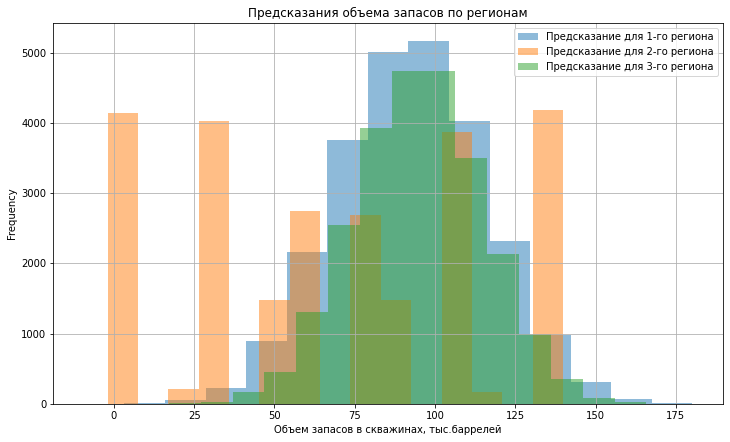

In [37]:
# Построим гистограммы предсказанных запасов нефти по регионам
region_predictions_1.plot(kind='hist', bins=15, alpha=0.5, legend=True, label='Предсказание для 1-го региона')
region_predictions_2.plot(kind='hist', bins=15, alpha=0.5, legend=True, label='Предсказание для 2-го региона')
region_predictions_3.plot(kind='hist', bins=15, grid=True, alpha=0.5, figsize=(12, 7), legend=True, 
                        label='Предсказание для 3-го региона', 
                        title='Предсказания объема запасов по регионам').set_xlabel('Объем запасов в скважинах, тыс.баррелей')

In [38]:
# Для того, что бы понять откуда взялась существенная разница между метрикками RMSE по регионам
# проверим корреляцию признаков и целевых признаков для каждого региона
# Определим корреляцию признаков для 1-го региона
region_data_1.drop('id', axis=1).corr().style.background_gradient('coolwarm')

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [39]:
# Определим корреляцию признаков для 2-го региона
region_data_2.drop('id',axis=1).corr().style.background_gradient('coolwarm')

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [40]:
# Определим корреляцию признаков для 3-го региона
region_data_3.drop('id', axis=1).corr().style.background_gradient('coolwarm')

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


### Вывод по п.2

После анализе результатов предсказаний запасов сырья по каждому региону можно сделать следующие выводы: по среднему запасу сырья на первом месте находится 3-й регион (94,5 тыс.баррелей), меньше всего средний запас сырья во 2-ом регионе (68,7 тыс.баррелей).

Однако необходимо учесть, что предсказания для 2-го региона оказались точнее, чем предсказания для остальных регионов, т.к. метрика модели `RMSE` для 2-го региона показала существенно меньше значение (0.9), чем метрики для 1-го (37.6) и 3-го (40.0) регионов.

Изучение корреляции признаков и целевых признаков по регионам показало, 
что во всех регионах значение целевых признаков больше всего зависит от признаков содержащихся в столбце **f2**, однако для 2-го региона признаки из столбца **f2** практически 100% совпадают с целевыми признаками. Т.е. где-то произошла утечка целевого признака. Этим и объясняется такая высокая точность модели для 2-го региона.


<a id='3-bullet'></a>
# 3. Подготовка к расчёту прибыли

In [41]:
# Схраним в переменную region_budget бюджет на разработку скважин в одном регионе
REGION_BUDGET = 10000000000

In [42]:
# Схраним в переменную region_point количество скважин планируемых к разработке в одном регионе
REGION_POINT = 200

In [43]:
# Схраним в переменную one_point_profit прибыль с одного баррелей нефти 
ONE_BARREL_PROFIT = 450

In [44]:
# Расчитаем стоимость одной скважины с учетом бюджета на регион 10 млрд. и кол-ва разрабатываемых скважин - 200 точек
ONE_POINT_COST = round(REGION_BUDGET/REGION_POINT, 2)
print('Стоимоить разработки одной скважины в регионе:', ONE_POINT_COST, 'руб.')

Стоимоить разработки одной скважины в регионе: 50000000.0 руб.


In [45]:
# Определим минимальный объем сырья в скважине для ее безубыточной разработки
# Безубыточными будем считать скважины прибыль от разработки которых полностью покрывает расход на их разработку
min_quantity_oil = round(ONE_POINT_COST/ONE_BARREL_PROFIT/1000, 3)
print('Минимальный объем скважины для безубыточной разработки:', min_quantity_oil, 'тыс.баррелей')

Минимальный объем скважины для безубыточной разработки: 111.111 тыс.баррелей


In [46]:
# Сравним средний фактический объем скважин по регионам с объемом необходимым для минимальной безубыточной разработки
data = [region_data_1['product'].mean(), region_data_2['product'].mean(), 
        region_data_3['product'].mean(), min_quantity_oil]
check_result = pd.DataFrame(data=data, columns=['Ср. запас сырья, тыс.баррелей'], 
                            index=['1-й регион', '2-й регион', '3-й регион', 'Мин. безубыточный запас сырья']) 
check_result

,"Ср. запас сырья, тыс.баррелей"
1-й регион,92.500
2-й регион,68.825
3-й регион,95.000
Мин. безубыточный запас сырья,111.111


In [47]:
# Добавим столбец с разницей между средним запасом сырья и минимальным безубыточным, в %
check_result['Разница между ср. и безубыточным запасами, %'] = (min_quantity_oil - check_result['Ср. запас сырья, тыс.баррелей']) / min_quantity_oil * 100 
check_result

,"Ср. запас сырья, тыс.баррелей","Разница между ср. и безубыточным запасами, %"
1-й регион,92.500,16.749917
2-й регион,68.825,38.057438
3-й регион,95.000,14.499914
Мин. безубыточный запас сырья,111.111,0.000000


### Вывод по п.3

Т.к. в регионе планируется разработать ***200 скважин*** и на каждый регион выделен бюджета в размере ***10 млрд.руб.***, 
минимальный объем необходимого запаса сырья в скважине для безубыточной разработки составит - ***111.11 тыс.баррелей***.
Безубыточной разработкой будем считать такую разработку, которая полностью покрывает расход, т.е. доход должен быть больше или равен нулю.

При этом средний запас сырья по всем скважинам в каждом регионах меньше необходимого безубыточного запаса сырья.
Ближе всего к безубыточному запасу сырья находится 1-й регион (на 16.7 тыс.баррелей меньше), 
больше всего разница между безубыточным и средним запасом сырья во 2-м регионе (на 38.1 тыс.баррелей меньше).
Данная разница не критична, она показывает лишь то, что в регионах есть так же скважины с небольшим запасом сырья,
но при дальнейших расчетах мы будем учитывать только скважины с максимальным запасом сырья.

<a id='4-bullet'></a>
# 4. Расчет прибыли по предсказаниям модели

In [49]:
# С помощью ф-ии определим доход от разработки скважин в 1-ом регионе
# Ф-ия выбирает 200 скважин с ниабольшим объемом сырья, далее суммирует этот объем, 
# умножает общий объем на прибыль от 1-го барреля и вычитает общий бюджет на регион. 
# Ф-ия выдает итоговое значение в миллиардах рублей 

def point_profit(t_valid, region_predict, point_count):
    profitable_point = region_predict.sort_values(ascending=False)
    selected_point = t_valid[profitable_point.index][:point_count]
    piont_product_sum = sum(selected_point)
    profit_of_point = (piont_product_sum * 1000 * ONE_BARREL_PROFIT - REGION_BUDGET) / 10**9
    return profit_of_point

target_valid_1 = target_valid_1.reset_index(drop=True)
region_1_profit = point_profit(target_valid_1, region_predictions_1, REGION_POINT)
print('Прибыль от разработки скважин в 1-ом регионе:', round(region_1_profit, 3), 'млрд.руб.')

Прибыль от разработки скважин в 1-ом регионе: 3.321 млрд.руб.


In [50]:
# С помощью ф-ии определим доход от разработки скважин в 2-ом регионе
target_valid_2 = target_valid_2.reset_index(drop=True)
region_2_profit = point_profit(target_valid_2, region_predictions_2, REGION_POINT)
print('Прибыль от разработки скважин в 2-ом регионе:', round(region_2_profit, 3), 'млрд.руб.')

Прибыль от разработки скважин в 2-ом регионе: 2.415 млрд.руб.


In [51]:
# С помощью ф-ии определим доход от разработки скважин в 3-м регионе
target_valid_3 = target_valid_3.reset_index(drop=True)
region_3_profit = point_profit(target_valid_3, region_predictions_3, REGION_POINT)
print('Прибыль от разработки скважин в 3-м регионе:', round(region_3_profit, 3), 'млрд.руб.')

Прибыль от разработки скважин в 3-м регионе: 2.71 млрд.руб.


In [52]:
# Сведем прибыли от разработки 200 лучших (наибольших по запасам сырья) скважин в трех регионах в общую таблицу 
region_profit = {}
region_profit['1-й регион'] = region_1_profit
region_profit['2-й регион'] = region_2_profit
region_profit['3-й регион'] = region_3_profit
region_profit = pd.DataFrame.from_dict(region_profit, orient = 'index', 
                                       columns=['Прибыль от разработки скважин, млрд.руб.'])
region_profit

,"Прибыль от разработки скважин, млрд.руб."
1-й регион,3.320826
2-й регион,2.415087
3-й регион,2.710350


Text(0.5, 0, 'Прибыль, млрд.руб.')

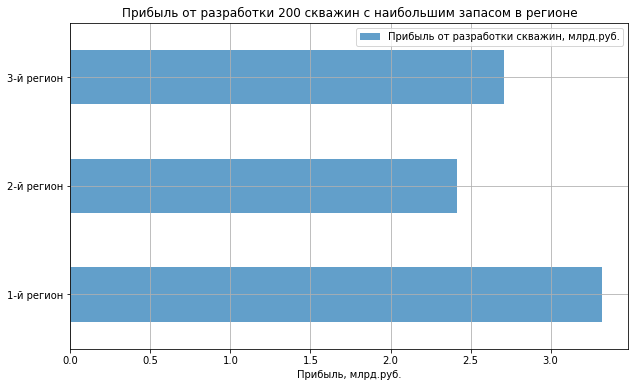

In [53]:
region_profit.plot(kind='barh', grid=True, alpha=0.7, figsize=(10, 6), legend=True, 
                   title='Прибыль от разработки 200 скважин с наибольшим запасом в регионе').set_xlabel('Прибыль, млрд.руб.')

### Вывод по п.4

Результаты расчета суммарной прибыли от разработки 200 скважинам с наибольшим запасом сырья в каждом регионе несколько отличаются от оценки регионов по среднему запасу сырья проведенной в п.2.4. Если по средему запасу сырья в скважине на первом месте был 3-й регион, то по объему прибыли от 200 скважин с наибольшим запасом сырья лидирует 1-й регион, это вероятно говорит о том, что в 1-ом регионе дельта между запасами сырья в скважинах больше чем в 3-м регионе. При этом и по среднему запасу сырья и по прибыли последнее место занимает 2-й регион.

<a id='5-bullet'></a>
## 5.Расчет рисков и прибыли для каждого региона

In [54]:
# С помощью метода Bootstrap определим для 1-го региона распределение планируемой прибыли 
# от разработки 200 скважин с наибольшим объемом 
# Для чего создадим ф-ию values_profit, которая перебирает 1000 выборок состоящих из 500 значений (запас 500 скважин)
# после чего передает полученную выборку ф-ии point_profit для расчета распределения прибыли 
state = np.random.RandomState(12345)

def values_profit(t_valid, r_predict):
    values = []
    for i in range(1000):        
        target_subsample = t_valid.sample(n=500, replace=True, random_state=state)
        predict_subsample = r_predict[target_subsample.index]
        values.append(point_profit(target_subsample, predict_subsample, REGION_POINT))
    return values
        
values_1 = pd.Series(values_profit(target_valid_1, region_predictions_1))
values_1.head()

0    0.585089
1    0.536393
2    0.211079
3    0.265280
4    0.271993
dtype: float64

In [55]:
# С помощью ф-ии propertys найдем для 1-го региона среднее значение прибыли от разработки 200 скважин maen_1; 
# риск убытков loss_1; 95-% доверительный интервал прибыли (lower_1; upper_1) 
def propertys(val):
    maen = round(val.mean(), 3)
    lower = round(val.quantile(0.025), 3)
    upper = round(val.quantile(0.975), 3)
    loss = (val[val < 0].count() / len(val)) * 100
    return maen, lower, upper, loss

maen_1, lower_1, upper_1, loss_1 = propertys(values_1)

In [56]:
# С помощью ф-ию values_profit определим распределение планируемой прибыли 
# от разработки 200 скважин с наибольшим объемом для 2-го региона  
values_2 = pd.Series(values_profit(target_valid_2, region_predictions_2))
values_2.head()

0    0.392099
1    0.128123
2    0.129554
3    0.510590
4    0.551206
dtype: float64

In [57]:
# С помощью ф-ии propertys найдем для 2-го региона среднее значение прибыли от разработки 200 скважин maen_2; 
# риск убытков loss_2; 95-% доверительный интервал прибыли (lower_2; upper_2) 
maen_2, lower_2, upper_2, loss_2 = propertys(values_2)

In [58]:
# С помощью ф-ию values_profit определим распределение планируемой прибыли 
# от разработки 200 скважин с наибольшим объемом для 3-го региона  
values_3 = pd.Series(values_profit(target_valid_3, region_predictions_3))
values_3.head()

0    0.745340
1    0.573671
2    0.242930
3    0.415386
4    0.545956
dtype: float64

In [59]:
# С помощью ф-ии propertys найдем для 3-го региона среднее значение прибыли от разработки 200 скважин maen_3; 
# риск убытков loss_3; 95-% доверительный интервал прибыли (lower_3; upper_3) 
maen_3, lower_3, upper_3, loss_3 = propertys(values_3)

In [60]:
# Сведем все найденные характеристики по каждому региону в общую таблицу для анализа
lst = {'1-й регион':[maen_1, [lower_1, upper_1], loss_1], '2-й регион':[maen_2, [lower_2, upper_2], loss_2], 
       '3-й регион':[maen_3, [lower_3, upper_3], loss_3]}
result_data = pd.DataFrame(lst, index=['Средняя прибыль (млрд.руб.)', '95-% доверительный интервал', 'Риск убытков (%)'])
result_data

,1-й регион,2-й регион,3-й регион
Средняя прибыль (млрд.руб.),0.426,0.518,0.42
95-% доверительный интервал,"[-0.102, 0.948]","[0.128, 0.954]","[-0.116, 0.99]"
Риск убытков (%),6,0.3,6.2


### Вывод по п.5

1-й и 3-й регионы имеют схожие значения средней прибыли и вероятности убытков. Но наибольший объем средней прибыли на 200 скважин получен для 2-го региона. Учитываю это, а также то, что вероятность убытков в данном регионе составляет 0.3%,
что не превышает вероятность убытков 2.5% по условию, 2-й регион полностью соответсвует условиям задачи.

<a id='6-bullet'></a>
## 6. Общий вывод

Согласно выполненному исследованию подходящим регионом для ведения разработки нефти является 2-й регион. Несмотря на то, что  регион не является лидером по скважинам с наибольшим содержанием сырья, средний доход от разработки скважин в данном регионе выше, чем в остальных регионах. Более того вероятность получения убытков во 2-м регионе меньше чем в 1-м и 3-м регионах.
Кроме того во рвемя исследования была обнаружена сильная корреляция между признакми указанными в столбце **f2** и целевыми признаками для 2-го региона, данную зависимость нужно учитывать как дополнительный фактор при оценке запасов по скважинам, т.к. данные признаки содержать практически те же данные, что должна предсказать модель.

Таким образом добывающей компании можно рекомендовать 2-й регион для разработки сырья. Но необходимо уточнить исходные данные, т.к. один из признаков требует проверки.